In [31]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit import transpile
from qiskit_aer import AerSimulator
import numpy as np
import random


# Initialize Protocol Parameters:

Decide the number of qubits (n) to transmit. The BB84 protocol typically requires a large number of qubits for secure key generation.

### Generate Random Bit and Basis Strings:
Both Alice and Bob randomly choose their bases (computational or Hadamard) and bits.


In [32]:
n = 100

alice_bits = [random.randint(0, 1) for _ in range(n)]  # Alice's random bits
alice_bases = [random.randint(0, 1) for _ in range(n)]  # Alice's random bases (0: Z-basis, 1: X-basis)


## Prepare Alice's Quantum States:

Use QuantumCircuit to encode Alice’s bits based on her chosen bases.

In [33]:
alice_qubits = []
for i in range(n):
    qc = QuantumCircuit(1, 1)  # Initialize a single qubit circuit
    
    # Encode the bit based on the chosen basis
    if alice_bases[i] == 0:  # Z-basis
        if alice_bits[i] == 1:
            qc.x(0)  # Flip to |1> if the bit is 1
    else:  # X-basis
        if alice_bits[i] == 1:
            qc.x(0)  # Flip to |1> state
        qc.h(0)  # Apply Hadamard to encode in X-basis
    
    alice_qubits.append(qc)  # Store the prepared qubit state


## Simulate Bob’s Measurements:
Bob randomly selects bases and measures Alice’s qubits accordingly.

In [34]:
from qiskit import transpile
# from qiskit.providers.aer import AerSimulator

# Initialize simulator
simulator = AerSimulator()

bob_bases = [random.randint(0, 1) for _ in range(n)]  # Bob's random bases
bob_results = []

for i in range(n):
    qc = alice_qubits[i].copy()  # Use Alice’s prepared state
    
    # Apply Hadamard if Bob is measuring in the X-basis
    if bob_bases[i] == 1:
        qc.h(0)
    
    # Add measurement to the circuit
    qc.measure(0, 0)
    
    # Transpile the circuit for the simulator
    new_circuit = transpile(qc, simulator)
    
    # Run the transpiled circuit on the simulator
    job = simulator.run(new_circuit, shots=1)
    result = job.result()
    
    # Extract and process the measurement result
    counts = result.get_counts(new_circuit)
    measured_bit = int(list(counts.keys())[0])  # Convert measurement outcome to integer
    bob_results.append(measured_bit)


## Key Sifting:
Compare bases to keep only the bits where Alice and Bob used the same basis.

In [35]:
sifted_key = []
for i in range(n):
    if alice_bases[i] == bob_bases[i]:  # Same basis
        sifted_key.append(bob_results[i])


## Error Checking (Optional):
- Alice and Bob disclose a subset of the sifted key to detect any eavesdropping.
- They compare a portion of their sifted key to estimate error rates.

In [36]:
sample_size = int(len(sifted_key) * 0.1)  # Use 10% for error estimation
sample_indices = random.sample(range(len(sifted_key)), sample_size)
alice_sample = [sifted_key[i] for i in sample_indices]
bob_sample = [bob_results[i] for i in sample_indices]
error_rate = sum([1 for i in range(sample_size) if alice_sample[i] != bob_sample[i]]) / sample_size

if error_rate > 0.25:
    print("Eavesdropping detected!")
else:
    print("No eavesdropping detected. Proceed with the rest of the key.")


Eavesdropping detected!


## Extract Final Key:
Remove the sampled bits used for error checking, leaving a shared, secure key.


In [37]:
final_key = [sifted_key[i] for i in range(len(sifted_key)) if i not in sample_indices]
print("Final Shared Key:", final_key)


Final Shared Key: [0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1]


# Whole code in one place

In [38]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import random

# Step 1: Initialize Protocol Parameters
n = 100  # Number of qubits for secure key generation

# Step 2: Generate Random Bit and Basis Strings
alice_bits = [random.randint(0, 1) for _ in range(n)]   # Alice's random bits
alice_bases = [random.randint(0, 1) for _ in range(n)]  # Alice's random bases (0: Z-basis, 1: X-basis)

# Step 3: Prepare Alice's Quantum States
alice_qubits = []
for i in range(n):
    qc = QuantumCircuit(1, 1)  # Initialize a single qubit circuit
    
    # Encode the bit based on the chosen basis
    if alice_bases[i] == 0:  # Z-basis
        if alice_bits[i] == 1:
            qc.x(0)  # Flip to |1> if the bit is 1
    else:  # X-basis
        if alice_bits[i] == 1:
            qc.x(0)  # Flip to |1> state
        qc.h(0)  # Apply Hadamard to encode in X-basis
    
    alice_qubits.append(qc)  # Store the prepared qubit state

# Step 4: Simulate Bob’s Measurements
simulator = AerSimulator()  # Initialize simulator
bob_bases = [random.randint(0, 1) for _ in range(n)]  # Bob's random bases
bob_results = []

for i in range(n):
    qc = alice_qubits[i].copy()  # Use Alice’s prepared state
    
    # Apply Hadamard if Bob is measuring in the X-basis
    if bob_bases[i] == 1:
        qc.h(0)
    
    # Add measurement to the circuit
    qc.measure(0, 0)
    
    # Transpile the circuit for the simulator
    new_circuit = transpile(qc, simulator)
    
    # Run the transpiled circuit on the simulator
    job = simulator.run(new_circuit, shots=1)
    result = job.result()
    
    # Extract and process the measurement result
    counts = result.get_counts(new_circuit)
    measured_bit = int(list(counts.keys())[0])  # Convert measurement outcome to integer
    bob_results.append(measured_bit)

# Step 5: Key Sifting
sifted_key = []
for i in range(n):
    if alice_bases[i] == bob_bases[i]:  # Same basis
        sifted_key.append(bob_results[i])

# Step 6: Error Checking (Optional)
# Compare a portion of the sifted key for eavesdropping detection
sample_size = int(len(sifted_key) * 0.1)  # Use 10% for error estimation
sample_indices = random.sample(range(len(sifted_key)), sample_size)
alice_sample = [sifted_key[i] for i in sample_indices]
bob_sample = [bob_results[i] for i in sample_indices]
error_rate = sum([1 for i in range(sample_size) if alice_sample[i] != bob_sample[i]]) / sample_size

if error_rate > 0.25:
    print("Eavesdropping detected!")
else:
    print("No eavesdropping detected. Proceed with the rest of the key.")

# Step 7: Extract Final Key
final_key = [sifted_key[i] for i in range(len(sifted_key)) if i not in sample_indices]
print("Final Shared Key:", final_key)


Eavesdropping detected!
Final Shared Key: [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1]


In [39]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
import random

# Step 1: Initialize Protocol Parameters
n = 500  # Increased number of qubits to improve statistical reliability

# Step 2: Generate Random Bit and Basis Strings
alice_bits = [random.randint(0, 1) for _ in range(n)]   # Alice's random bits
alice_bases = [random.randint(0, 1) for _ in range(n)]  # Alice's random bases (0: Z-basis, 1: X-basis)

# Step 3: Prepare Alice's Quantum States
alice_qubits = []
for i in range(n):
    qc = QuantumCircuit(1, 1)  # Initialize a single qubit circuit
    
    # Encode the bit based on the chosen basis
    if alice_bases[i] == 0:  # Z-basis
        if alice_bits[i] == 1:
            qc.x(0)  # Flip to |1> if the bit is 1
    else:  # X-basis
        if alice_bits[i] == 1:
            qc.x(0)  # Flip to |1> state
        qc.h(0)  # Apply Hadamard to encode in X-basis
    
    alice_qubits.append(qc)  # Store the prepared qubit state

# Step 4: Add Noise Model for Realism
# Creating a depolarizing noise model to simulate realistic noise
noise_model = NoiseModel()
depol_error = depolarizing_error(0.01, 1)  # 1% error rate for single qubit operations
noise_model.add_all_qubit_quantum_error(depol_error, ['h', 'x'])

# Step 5: Simulate Bob’s Measurements
simulator = AerSimulator(noise_model=noise_model)  # Initialize simulator with noise model
bob_bases = [random.randint(0, 1) for _ in range(n)]  # Bob's random bases
bob_results = []

for i in range(n):
    qc = alice_qubits[i].copy()  # Use Alice’s prepared state
    
    # Apply Hadamard if Bob is measuring in the X-basis
    if bob_bases[i] == 1:
        qc.h(0)
    
    # Add measurement to the circuit
    qc.measure(0, 0)
    
    # Transpile the circuit for the simulator
    new_circuit = transpile(qc, simulator)
    
    # Run the transpiled circuit on the simulator
    job = simulator.run(new_circuit, shots=1)
    result = job.result()
    
    # Extract and process the measurement result
    counts = result.get_counts(new_circuit)
    measured_bit = int(list(counts.keys())[0])  # Convert measurement outcome to integer
    bob_results.append(measured_bit)

# Step 6: Key Sifting
sifted_key = []
for i in range(n):
    if alice_bases[i] == bob_bases[i]:  # Same basis
        sifted_key.append(bob_results[i])

# Step 7: Error Checking (Optimized)
# Using a larger sample size to improve accuracy of error estimation
sample_size = int(len(sifted_key) * 0.2)  # Use 20% for error estimation
sample_indices = random.sample(range(len(sifted_key)), sample_size)
alice_sample = [sifted_key[i] for i in sample_indices]
bob_sample = [bob_results[i] for i in sample_indices]
error_rate = sum([1 for i in range(sample_size) if alice_sample[i] != bob_sample[i]]) / sample_size

# Adjusted threshold to be more stringent
if error_rate > 0.2:
    print("Eavesdropping detected!")
else:
    print("No eavesdropping detected. Proceed with the rest of the key.")

# Step 8: Extract Final Key
final_key = [sifted_key[i] for i in range(len(sifted_key)) if i not in sample_indices]
print("Final Shared Key:", final_key)


Eavesdropping detected!
Final Shared Key: [0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0]


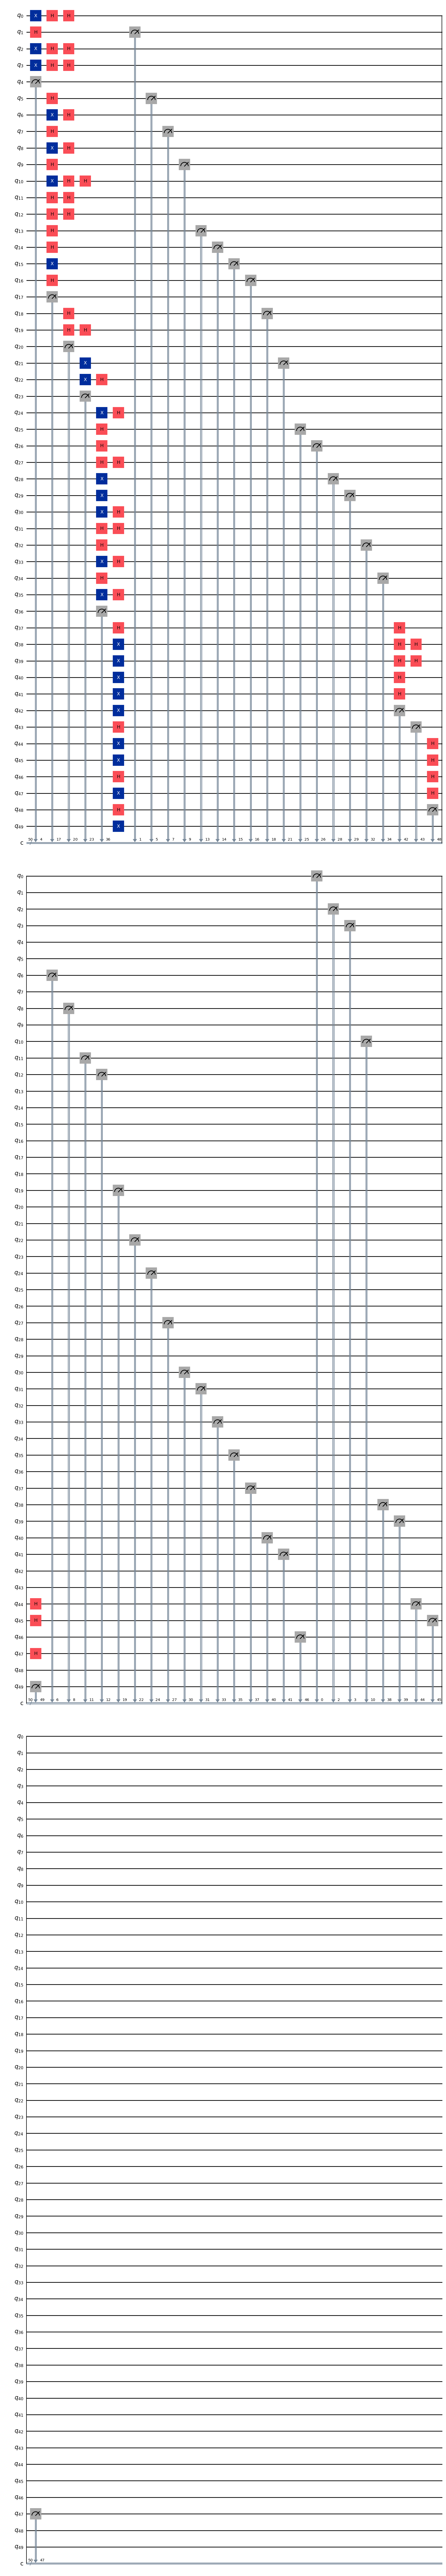

In [48]:
from qiskit import QuantumCircuit
import random

# Initialize the number of qubits for the circuit drawing
n = 50  # Reduced to 50 for the circuit drawing

# Step 2: Generate Random Bit and Basis Strings for Alice and Bob
alice_bits = [random.randint(0, 1) for _ in range(n)]
alice_bases = [random.randint(0, 1) for _ in range(n)]
bob_bases = [random.randint(0, 1) for _ in range(n)]

# Prepare the circuit for Alice's encoding and Bob's measurement
combined_circuit = QuantumCircuit(n, n)

for i in range(n):
    # Alice's Encoding
    if alice_bases[i] == 0:  # Z-basis
        if alice_bits[i] == 1:
            combined_circuit.x(i)  # Flip to |1> if the bit is 1
    else:  # X-basis
        if alice_bits[i] == 1:
            combined_circuit.x(i)
        combined_circuit.h(i)  # Apply Hadamard to encode in X-basis

    # Bob's Measurement
    if bob_bases[i] == 1:  # If Bob is measuring in X-basis
        combined_circuit.h(i)  # Apply Hadamard before measurement
    combined_circuit.measure(i, i)

# Draw the combined circuit
combined_circuit.draw(output='mpl')


# Implementation of Public Key Distribution in Bitcoin using Elliptic Curve Digital Signature Algorithm (ECDSA)

In [42]:
from ecdsa import SigningKey, SECP256k1
import hashlib
import random

# Step 1: Generate Private and Public Keys for Bitcoin
def generate_bitcoin_keypair():
    private_key = SigningKey.generate(curve=SECP256k1)  # Generate private key
    public_key = private_key.verifying_key  # Derive public key
    return private_key, public_key

# Step 2: Simulate Key Distribution
def distribute_bitcoin_key(sender_key, receiver_public_key):
    # Eavesdropping detection: simulate with a random chance of interception
    intercepted = random.choice([True, False])
    
    if intercepted:
        print("Eavesdropping detected! Key transmission is compromised.")
    else:
        print("Key transmitted securely.")

    # Send public key securely if no interception
    return receiver_public_key.to_string().hex() if not intercepted else None

# Step 3: Bitcoin-style Hashing of Public Key (to simulate address generation)
def bitcoin_address(public_key_hex):
    sha256_bpk = hashlib.sha256(bytes.fromhex(public_key_hex)).hexdigest()
    ripemd160_bpk = hashlib.new("ripemd160", bytes.fromhex(sha256_bpk)).hexdigest()
    address = "1" + ripemd160_bpk  # Simplified Bitcoin address format
    return address

# Usage
private_key_btc, public_key_btc = generate_bitcoin_keypair()
public_key_hex_btc = public_key_btc.to_string().hex()
print("Bitcoin Public Key:", public_key_hex_btc)
print("Bitcoin Address:", bitcoin_address(public_key_hex_btc))

# Simulate secure key transmission with eavesdropping detection
secure_public_key = distribute_bitcoin_key(private_key_btc, public_key_btc)
if secure_public_key:
    print("Public Key transmitted securely:", secure_public_key)


Bitcoin Public Key: 920d29fd378c2c6fc667962c645ae9cee0f27b1a5757d2a9cad280ab056e5fb9c1d101167f67601da6bb8111151b323aee4c5bda9404edd1275e5c35e9227ad4
Bitcoin Address: 18c3ffd3b00e253514df0fb9a04c0c034e0434ad2
Key transmitted securely.
Public Key transmitted securely: 920d29fd378c2c6fc667962c645ae9cee0f27b1a5757d2a9cad280ab056e5fb9c1d101167f67601da6bb8111151b323aee4c5bda9404edd1275e5c35e9227ad4


# Implementation of Public Key Distribution in Ethereum using secp256k1 Elliptic Curve Digital Signature Algorithm (ECDSA)

In [45]:
from ecdsa import SigningKey, SECP256k1
# import sha3  # For Keccak-256 hashing in Ethereum
import hashlib
import random

# Step 1: Generate Private and Public Keys for Ethereum
def generate_ethereum_keypair():
    private_key = SigningKey.generate(curve=SECP256k1)  # Generate private key
    public_key = private_key.verifying_key  # Derive public key
    return private_key, public_key

# Step 2: Simulate Key Distribution
def distribute_ethereum_key(sender_key, receiver_public_key):
    # Eavesdropping detection: simulate with a random chance of interception
    intercepted = random.choice([True, False])
    
    if intercepted:
        print("Eavesdropping detected! Key transmission is compromised.")
    else:
        print("Key transmitted securely.")
    
    # Send public key securely if no interception
    return receiver_public_key.to_string().hex() if not intercepted else None

# Step 3: Ethereum-style Address Generation
def ethereum_address(public_key_hex):
    # keccak = sha3.keccak_256()
    keccak = hashlib.sha3_256() # Keccak-256 hashing using hashlib
    keccak.update(bytes.fromhex(public_key_hex))
    return "0x" + keccak.hexdigest()[-40:]  # Ethereum address is the last 20 bytes

# Usage
private_key_eth, public_key_eth = generate_ethereum_keypair()
public_key_hex_eth = public_key_eth.to_string().hex()
print("Ethereum Public Key:", public_key_hex_eth)
print("Ethereum Address:", ethereum_address(public_key_hex_eth))

# Simulate secure key transmission with eavesdropping detection
secure_public_key_eth = distribute_ethereum_key(private_key_eth, public_key_eth)
if secure_public_key_eth:
    print("Public Key transmitted securely:", secure_public_key_eth)


Ethereum Public Key: 0025383494bc940f3202b888a6eda6bdc282f8499b292a5a5f377364b6c31505b336057d5d5717d4a979dcf9913f14923e6bdcdefb76a22dfb13680e705c0ce8
Ethereum Address: 0x8145a63c2bc3b3e3b4a72436490260dc55893987
Eavesdropping detected! Key transmission is compromised.
